In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


## Chargement du dataset standardisé

In [2]:
df = pd.read_csv("elliptic_standardized.csv")


### Identifier les colonnes numériques pour K-Means

In [3]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['is_outlier_univ', 'is_outlier_multi']]
print (numeric_cols)

['txId', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_8', 'feature_11', 'feature_13', 'feature_16', 'feature_17', 'feature_21', 'feature_23', 'feature_24', 'feature_25', 'feature_27', 'feature_35', 'feature_37', 'feature_39', 'feature_41', 'feature_43', 'feature_45', 'feature_49', 'feature_53', 'feature_54', 'feature_55', 'feature_57', 'feature_59', 'feature_60', 'feature_63', 'feature_71', 'feature_72', 'feature_75', 'feature_77', 'feature_81', 'feature_83', 'feature_89', 'feature_90', 'feature_91', 'feature_93', 'feature_95', 'feature_96', 'feature_97', 'feature_99', 'feature_103', 'feature_105', 'feature_107', 'feature_108', 'feature_109', 'feature_111', 'feature_113', 'feature_114', 'feature_115', 'feature_117', 'feature_119', 'feature_120', 'feature_121', 'feature_123', 'feature_125', 'feature_126', 'feature_127', 'feature_128', 'feature_129', 'feature_131', 'feature_132', 'feature_134', 'feature_135', 'feature_138', 'feature_139', 'featur

### Détermination du k optimal pour K-Means
##### Elbow Method

In [ ]:

# Plage de k à tester
K_range = range(2, 15)  # on teste k de 2 à 14
inertia_list = []
sil_list = []

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(df[numeric_cols])
    
    # Somme des distances intra-cluster (inertia)
    inertia_list.append(km.inertia_)
    
    # Silhouette Score
    sil_list.append(silhouette_score(df[numeric_cols], labels))

# Visualisation
plt.figure(figsize=(14,5))

# Elbow Method
plt.subplot(1,2,1)
plt.plot(K_range, inertia_list, marker='o')
plt.title("Elbow Method")
plt.xlabel("Nombre de clusters k")
plt.ylabel("Inertia (SSE)")

# Silhouette Score
plt.subplot(1,2,2)
plt.plot(K_range, sil_list, marker='o', color='orange')
plt.title("Silhouette Score")
plt.xlabel("Nombre de clusters k")
plt.ylabel("Score de silhouette")

plt.tight_layout()
plt.show()

# Affichage du meilleur k selon Silhouette
best_k_sil = K_range[sil_list.index(max(sil_list))]
print(f"Meilleur k selon Silhouette Score: {best_k_sil}")

In [4]:
#### K-Means sur toutes les features sélectionnées (K=5)

In [5]:
k = 5  # Nombre de clusters
kmeans = KMeans(n_clusters=k, random_state=42)
df['kmeans_clusters'] = kmeans.fit_predict(df[numeric_cols])
# Inertia et silhouette pour évaluer les clusters
inertia = kmeans.inertia_
sil_score = silhouette_score(df[numeric_cols], df['kmeans_clusters'])

print(f"Inertia: {inertia:.2f}, Silhouette Score: {sil_score:.3f}")

Inertia: 16040299.83, Silhouette Score: 0.068


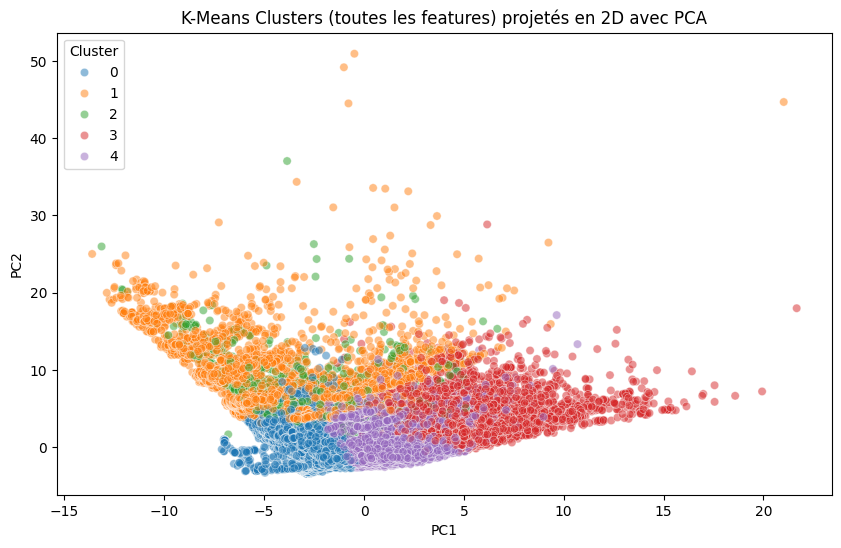

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df[numeric_cols])

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['kmeans_clusters'], palette='tab10', alpha=0.5)

plt.title("K-Means Clusters (toutes les features) projetés en 2D avec PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

* Inertia: The high value suggests points are far from their cluster centroids, reflecting the loose, gradient-like structure seen in the PCA plot, where clusters blend rather than separate distinctly.
* Silhouette Score: A value of 0.068 (well below 0.2) indicates very weak separation between clusters, confirming significant overlap and poor definition. This aligns with the visual evidence of a continuous data distribution.

### K-Means après réduction de dimension PCA (2 composantes)

Silhouette Score after PCA: 0.438


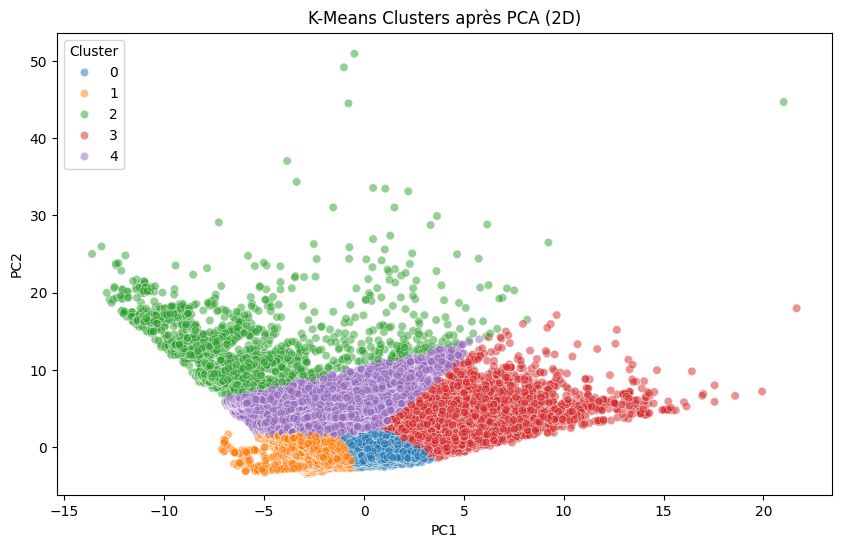

In [8]:
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(df[numeric_cols])

kmeans_pca = KMeans(n_clusters=k, random_state=42)
df['kmeans_pca_clusters'] = kmeans_pca.fit_predict(X_pca2)

# Silhouette
sil_score_pca = silhouette_score(X_pca2, df['kmeans_pca_clusters'])
print(f"Silhouette Score after PCA: {sil_score_pca:.3f}")

# Visualisation
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=df['kmeans_pca_clusters'], palette='tab10', alpha=0.5)
plt.title("K-Means Clusters après PCA (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster")
plt.show()

* The Silhouette Score of 0.438 indicates moderate to good clustering quality after applying K-Means to PCA-reduced data, suggesting PCA helped reveal meaningful transaction patterns in the Elliptic dataset. Clusters are more distinct, but some overlap remains, so further validation with labels or k optimization could enhance the results.

### Visualisation des clusters avec outliers mis en évidence

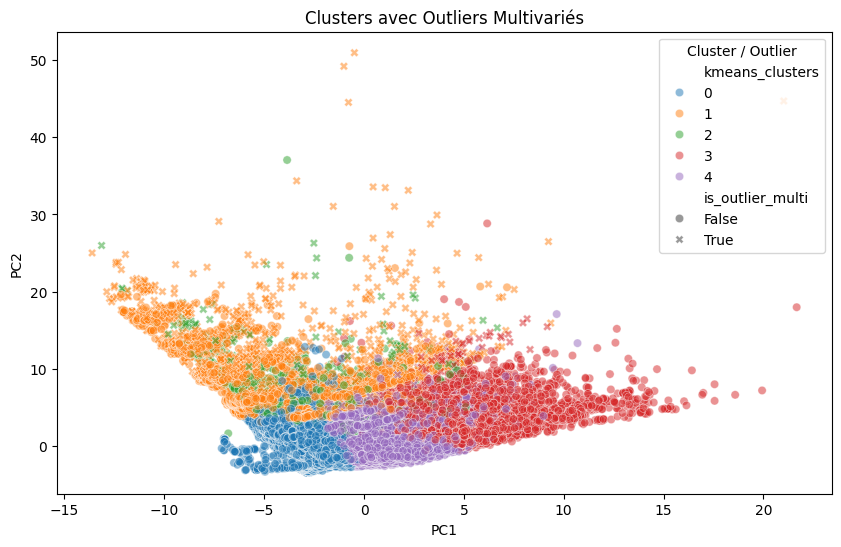

In [11]:
# 
plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca2[:,0], y=X_pca2[:,1], hue=df['kmeans_clusters'], style=df['is_outlier_multi'],
                palette='tab10', alpha=0.5)
plt.title("Clusters avec Outliers Multivariés")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster / Outlier")
plt.show()


* clusters with more outliers (×), especially in sparse areas like the upper or left regions (e.g., cluster 2/green). they likely represent unusual transaction patterns.
* The isolated points  may also indicate suspicious activity, as they differ from the dense, typical transactions .
